# Fourier Series and Differential Equation with some applications

In this article, a few applications of Fourier Series in solving differential equations will be described. All the problems are taken from the **edx Course: MITx - 18.03Fx: Differential Equations Fourier Series and Partial Differential Equations**. 

First a basic introduction to the Fourier series will be given and then we shall see how to solve the following ODEs / PDEs using Fourier series:

1. Find the steady state solution to undamped / damped systems with pure / near **resonance**.
2. Solve the $4^{th}$ order differential equation for **beam bending** system with **boundary values**, using theoretical and numeric techniques.
3. Solve the *PDE* for **Heat** / Diffusion.
4. Solve **Wave** equation (PDE).


## Some basics

Let $f(t)$ be a periodic function with period $L$.Then the Fourier series of $f(t)$ is given by the following superposition

![](f1.png)

The formulas can be simplified as below, for even and odd functions

![](f2.png)

A few popular $2\pi$ periodic functions and their Fourier series are shown below:

![](f3.png)

### Computing the Fourier coefficients for the Square wave

![](f4.png)

### Computing the coefficients in R

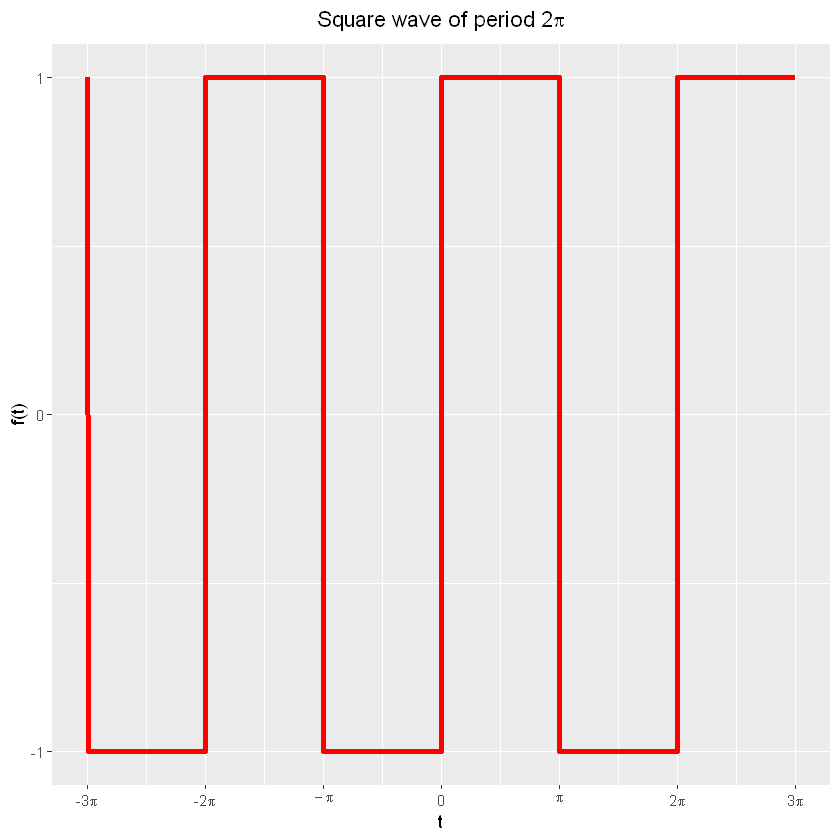

In [18]:
library(ggplot2)
library(latex2exp)

Sq <- function(t) {
  ifelse(t > 0, ifelse(as.integer(t / pi) %% 2 == 0, 1, -1), 
                ifelse(as.integer(t / pi) %% 2 == 1, 1, -1))
}

t <- seq(-3*pi, 3*pi, 0.01)
ggplot() + 
  geom_line(aes(t, Sq(t)), size=1.5, col='red') +
  ylab('f(t)') +
  scale_x_continuous(breaks=seq(-3*pi, 3*pi, pi),
        labels=c(TeX('$-3\\pi$'),TeX('$-2\\pi$'),TeX('$-\\pi$'),0,TeX('$\\pi$'),TeX('$2\\pi$'),TeX('$3\\pi$'))) +
  scale_y_continuous(breaks=c(-1,0,1), labels=c('-1', '0', '1')) + 
  ggtitle(TeX(paste('Square wave of period $2\\pi$'))) +
  theme(plot.title = element_text(hjust = 0.5))

In [1]:
for (n in 1:6) {
    b_n <- round(2/pi * integrate(function(t) sin(n*t), 0, pi)$value, 15)
    print(paste(b_n, ifelse(n %% 2 == 0, 0, 4/n/pi)))                         
}

[1] "1.27323954473516 1.27323954473516"
[1] "0 0"
[1] "0.424413181578388 0.424413181578388"
[1] "0 0"
[1] "0.254647908947032 0.254647908947033"
[1] "0 0"


![](Sq.gif)

Notice that the square wave has disconticuities at points $t=k\pi$, where $k \in Z$, the convergence of the Fourier series with the original periodic function is very slow near the discontinuities, which is known as **Gibbs phenomenon**.

### Computing the Fourier Coefficients of the Triange Wave using Anti-derivatives

![](f5.png)

First let's write a few lines of code to plot the triangle wave. 

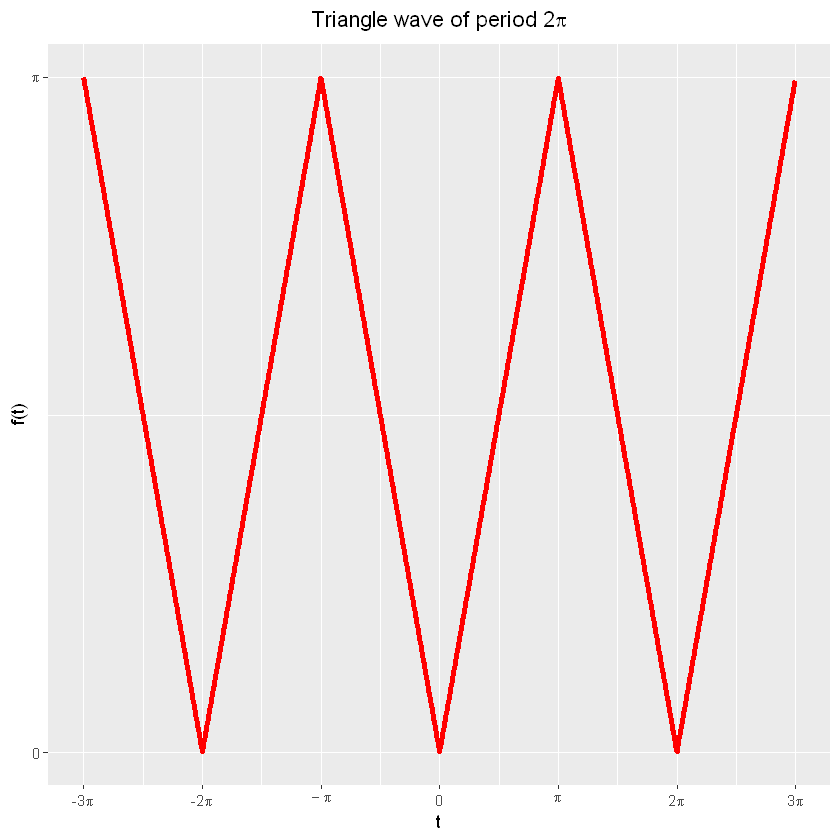

In [30]:
Tr <- function(t) {
  i <- as.integer(t / pi)
  ifelse(t > 0, ifelse(i %% 2 == 0, t - i*pi, -t + (i+1)*pi), 
                ifelse(i %% 2 == 0, -t + i*pi, t - (i-1)*pi))
}

t <- seq(-3*pi, 3*pi, 0.01)
ggplot() + 
  geom_line(aes(t, Tr(t)), size=1.5, col='red') +
  ylab('f(t)') +
  scale_x_continuous(breaks=seq(-3*pi, 3*pi, pi),
        labels=c(TeX('$-3\\pi$'),TeX('$-2\\pi$'),TeX('$-\\pi$'),0,TeX('$\\pi$'),TeX('$2\\pi$'),TeX('$3\\pi$'))) +
  scale_y_continuous(breaks=c(-pi,0,pi), labels=c(TeX('$-\\pi$'), '0', TeX('$\\pi$'))) + 
  ggtitle(TeX(paste('Triangle wave of period $2\\pi$'))) +
  theme(plot.title = element_text(hjust = 0.5))

### computign the constant term

In [36]:
a_0 = 1/pi*integrate(t, 0, pi)$value
print(paste(a_0, pi/2))

[1] "1.5707963267949 1.5707963267949"


![](f5.png)

The next figure shows how the superpostion of first few terms in the Fourier series approximates the triangle wave function.

![](Tr.gif)

## Solution of ODE with ERF and Resonance

![](f7.png)

The next section shows how to find the largest gain corresponding to the following system with damping

![](f8.png)

Let's plot the amplitudes of the terms to see which term has the largest gain.

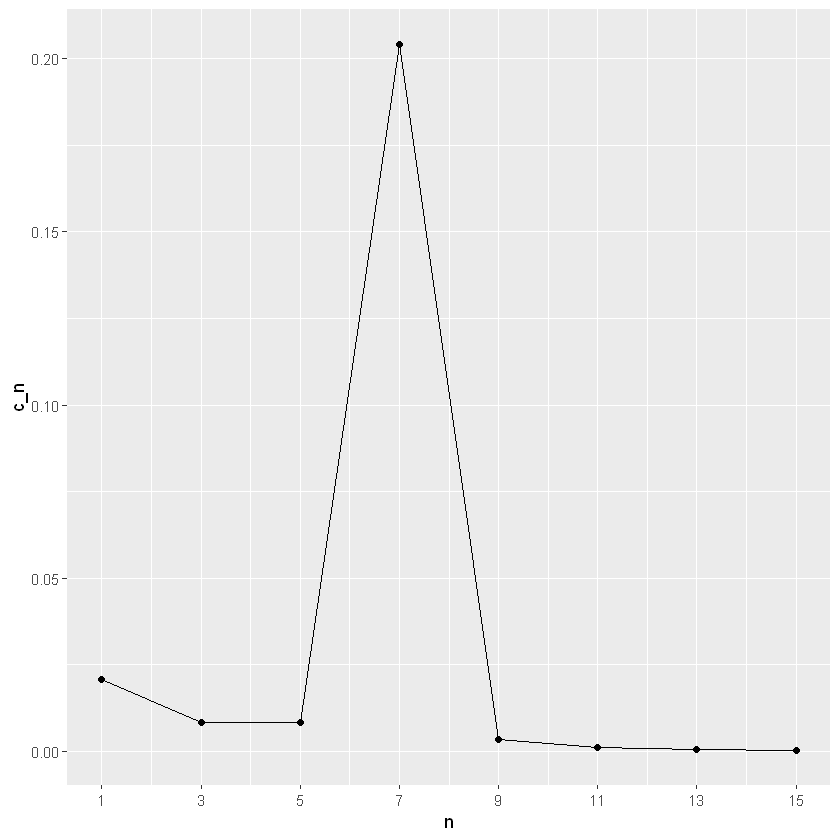

In [37]:
n <- seq(1,15,2)
f <- (1/sqrt((49-n^2)^2 + (0.1*n)^2)/n)
ggplot() + geom_point(aes(n, f))  +
  geom_line(aes(n, f)) + ylab('c_n') +
  scale_x_continuous(breaks=seq(1,15,2),
                     labels=as.character(seq(1,15,2)))

## Boundary Value Problems

![](f9.png)

![](beam.gif)

### Numerically solving a linear system to obtain the solution of the beam-bending system represented by the $4^{th}$ order differential equation in R

In [65]:
n <- 10

library(Matrix)
# tridaiagonal matrix
A <- bandSparse(n, n, #dimensions
                (-2):2, #band, diagonal is number 0
                list(rep(1, n-2),
                     rep(-4, n-1), 
                     rep(6, n), 
                     rep(-4, n-1),
                     rep(1, n-2)))
A <- as.matrix(A)
A[1,1] <- A[2,1:2] <- A[10,10] <- 1
A[1,2:3] <- A[2,3:4] <- 0
A[9,10] <- -1
A[9,9] <- 3
A[9,8] <- -3
A[10,9] <- -2
A

1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
1,-4,6,-4,1,0,0,0,0,0
0,1,-4,6,-4,1,0,0,0,0
0,0,1,-4,6,-4,1,0,0,0
0,0,0,1,-4,6,-4,1,0,0
0,0,0,0,1,-4,6,-4,1,0
0,0,0,0,0,1,-4,6,-4,1
0,0,0,0,0,0,1,-3,3,-1
0,0,0,0,0,0,0,1,-2,1


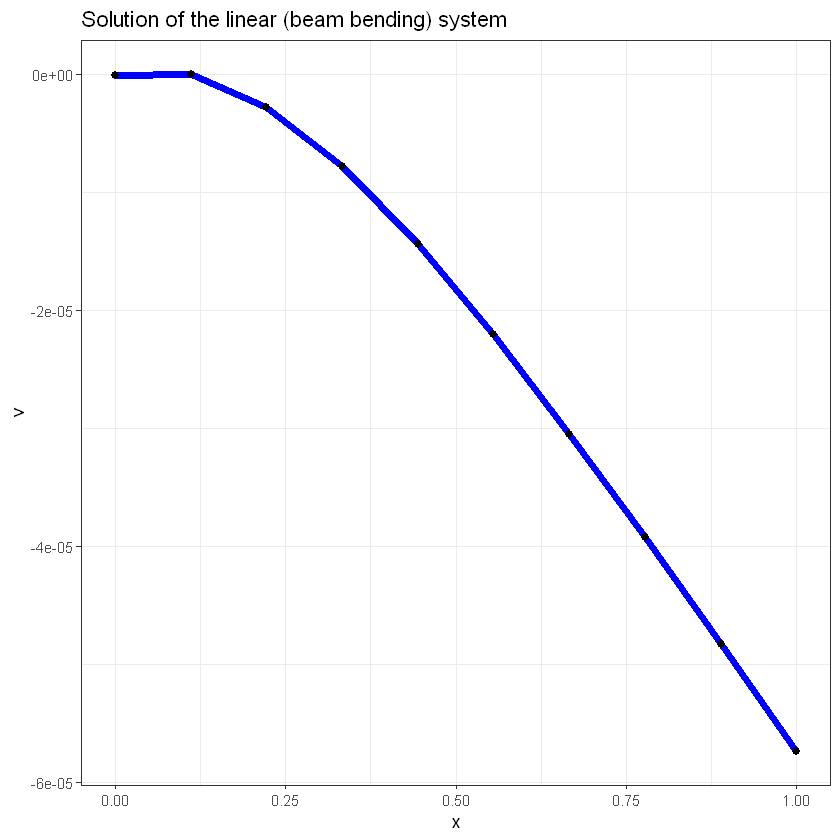

In [67]:
#Create a vector b that is zero for boundary conditions and -0.0000001 in every other entry.
b = rep(1,10)*(-1e-7)
# Create a vector v that solves Av = b.
v = solve(A, b)
#Create a column vector x of 10 evenly spaced points between 0 and 1 (for plotting)
x = seq(0,1,1/9)
#Plot v on the vertical axis, and x on the horizontal axis.
print(ggplot() + geom_line(aes(x,v), col='blue', size=2) + geom_point(aes(x, v), size=2) + 
      ggtitle(paste('Solution of the linear (beam bending) system')) + theme_bw())

## Heat Equation

![](f15.png)

In [4]:
#install.packages('latex2exp', repos='http://cran.us.r-project.org')
library(animation)
library(ggplot2)
library(latex2exp)

saveGIF({
    x <- seq(0,pi,pi/19)
    u <- rep(1, 20)
    t <- 0
    print(ggplot() + geom_line(aes(x, u), lwd=2, col='red') + 
               ylim(0,1) + xlab('x (position)') + ylab(TeX('$\\theta \\; (temperature)$')) + 
               ggtitle(paste('(initial condition) heat diffusion, t = ', t)) +
               theme_bw() +
               theme(plot.title = element_text(hjust = 0.5)))
    n <- 1:10000
    for (t in seq(0.15, 6.5, 0.05)) {
        print(t)
        u <- rep(0,20)
        for (i in 1:20) {
            u[i] = sum(exp(-n^2*t)*sin(n*x[i])/n)
        }
        #Plot solution
        print(ggplot() + geom_line(aes(x, u), lwd=2, col='red') + 
                   ylim(0,1) + xlab('x (position)') + ylab(TeX('$\\theta \\; (temperature)$')) + 
                   ggtitle(paste('heat diffusion, t = ', t)) +
                   theme_bw() +
                   theme(plot.title = element_text(hjust = 0.5)))
    }
})

[1] 0.15
[1] 0.2
[1] 0.25
[1] 0.3
[1] 0.35
[1] 0.4
[1] 0.45
[1] 0.5
[1] 0.55
[1] 0.6
[1] 0.65
[1] 0.7
[1] 0.75
[1] 0.8
[1] 0.85
[1] 0.9
[1] 0.95
[1] 1
[1] 1.05
[1] 1.1
[1] 1.15
[1] 1.2
[1] 1.25
[1] 1.3
[1] 1.35
[1] 1.4
[1] 1.45
[1] 1.5
[1] 1.55
[1] 1.6
[1] 1.65
[1] 1.7
[1] 1.75
[1] 1.8
[1] 1.85
[1] 1.9
[1] 1.95
[1] 2
[1] 2.05
[1] 2.1
[1] 2.15
[1] 2.2
[1] 2.25
[1] 2.3
[1] 2.35
[1] 2.4
[1] 2.45
[1] 2.5
[1] 2.55
[1] 2.6
[1] 2.65
[1] 2.7
[1] 2.75
[1] 2.8
[1] 2.85
[1] 2.9
[1] 2.95
[1] 3
[1] 3.05
[1] 3.1
[1] 3.15
[1] 3.2
[1] 3.25
[1] 3.3
[1] 3.35
[1] 3.4
[1] 3.45
[1] 3.5
[1] 3.55
[1] 3.6
[1] 3.65
[1] 3.7
[1] 3.75
[1] 3.8
[1] 3.85
[1] 3.9
[1] 3.95
[1] 4
[1] 4.05
[1] 4.1
[1] 4.15
[1] 4.2
[1] 4.25
[1] 4.3
[1] 4.35
[1] 4.4
[1] 4.45
[1] 4.5
[1] 4.55
[1] 4.6
[1] 4.65
[1] 4.7
[1] 4.75
[1] 4.8
[1] 4.85
[1] 4.9
[1] 4.95
[1] 5
[1] 5.05
[1] 5.1
[1] 5.15
[1] 5.2
[1] 5.25
[1] 5.3
[1] 5.35
[1] 5.4
[1] 5.45
[1] 5.5
[1] 5.55
[1] 5.6
[1] 5.65
[1] 5.7
[1] 5.75
[1] 5.8
[1] 5.85
[1] 5.9
[1] 5.95
[1] 6
[1] 6.05


Output at: animation.gif


[1] TRUE

In [ ]:
n <- 1:100
x = seq(0,pi,pi/19)      #Spatial grid
t <- 1
u = sum(exp(-n^2*t)*sin(n*x)/n)
print(u)

In [34]:
#Solve heat equation using forward time, centered space scheme

#Define simulation parameters----------------------------------------------
x = seq(0,5,5/19)      #Spatial grid
dt = 0.06              #Time step        
tMax = 20              #Simulation time
nu = 0.5               #Constant of proportionality

t = seq(0, tMax, dt)  #Time vector

n <- length(x)
m <- length(t)

fLeft <- function(t) 0                              #Left boundary condition
fRight <- function(t) sin(2*pi*t/5)                 #Right boundary condition
fInitial <- function(x) matrix(rep(0,m*n), nrow=m)  #Initial condition

#Run simulation------------------------------------------------------------
dx = x[2]-x[1]
r = nu*dt/dx^2
print(paste('r = ', r))

#Create tri-diagonal matrix
#A = spdiags([r*ones(n,1),(1-2*r)*ones(n,1),r*ones(n,1)],[-1,0,1],n,n);
library(Matrix)
# tridaiagonal matrix
A <- bandSparse(n, n, #dimensions
                (-1):1, #band, diagonal is number 0
                list(rep(r, n-1), 
                     rep(1-2*r, n), 
                     rep(r, n-1)))
A <- as.matrix(A)
#print(A)

#Impose inital conditions
u = fInitial(x) 
u[1,1] = fLeft(0) 
u[1,n] = fRight(0)

print(dim(A))
print(length(u[1,]))

library(animation)
library(ggplot2)

saveGIF({
    for (i in 1:(length(t)-1)) {
        u[i+1,] = A%*%(u[i,])     # %Find solution at next time step
        u[i+1,1] = fLeft(t[i])    # Impose left B.C.
        u[i+1,n] = fRight(t[i])   # Impose right B.C.

        #Plot solution
        print(ggplot() + geom_line(aes(x, u[i+1,]), lwd=2, col='red') + 
                   ylim(-1.5,1.5) + xlab('x') + ylab('u') + 
                   ggtitle(paste('heat diffusion, t = ', round(t[i],3))) +
                   theme_bw() +
                   theme(plot.title = element_text(hjust = 0.5)))
        #xlab('$x$','interpreter','latex') 
        #ylabel('$u$','interpreter','latex')
        #title(['$t=$',num2str(t(i),'%.3f')],'interpreter','latex')        
    }
})

[1] "r =  0.4332"
[1] 20 20
[1] 20


Output at: animation.gif


[1] TRUE

,A 1,A 2,A 3,A 4,A 5,A 6,A 7,A 8,A 9,A 10,A 11,A 12,A 13,A 14,A 15,A 16,A 17,A 18,A 19,A 20
A 1,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0
A 2,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0
A 3,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0
A 4,0.0000,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0
A 5,0.0000,0.0000,0.0000,0.4332,0.1336,0.4332,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0
A 6,0.0000,0.0000,0.0000,0.0000,0.4332,0.1336,0.4332,0,0,0,0,0,0,0,0,0,0,0,0,0


Var1,Var2,value
1,1,0.1336
2,1,0.4332
3,1,0.0000
4,1,0.0000
5,1,0.0000
6,1,0.0000


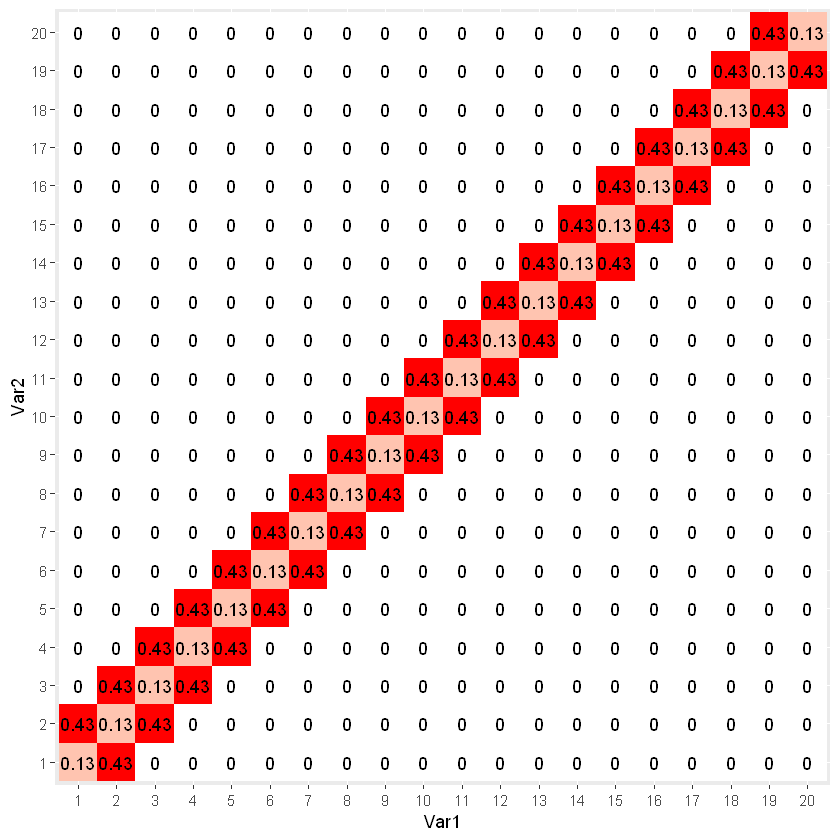

In [55]:
library(tidyverse)
A  <- as.data.frame(A)
rownames(A) <- names(A) <- paste("A", 1:20)
head(A)
## reshape data (tidy/tall form)
dat2 <- A %>%
    tbl_df() %>%
    rownames_to_column('Var1') %>%
    gather(Var2, value, -Var1) %>%
    mutate(
        Var1 = factor(Var1, levels=1:20),
        Var2 = factor(gsub("A ", "", Var2), levels=1:20)
    )

head(dat2)

## plot data
ggplot(dat2, aes(Var1, Var2)) +
    geom_tile(aes(fill = value)) + 
    geom_text(aes(label = round(value, 2))) +
    scale_fill_gradient(low = "white", high = "red") + guides(fill=FALSE)

Warning message in heatmap.2(A, Rowv = FALSE, symm = TRUE, col = rev(terrain.colors(16)), :
"Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram."Warning message in heatmap.2(A, Rowv = FALSE, symm = TRUE, col = rev(terrain.colors(16)), :
"Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram."

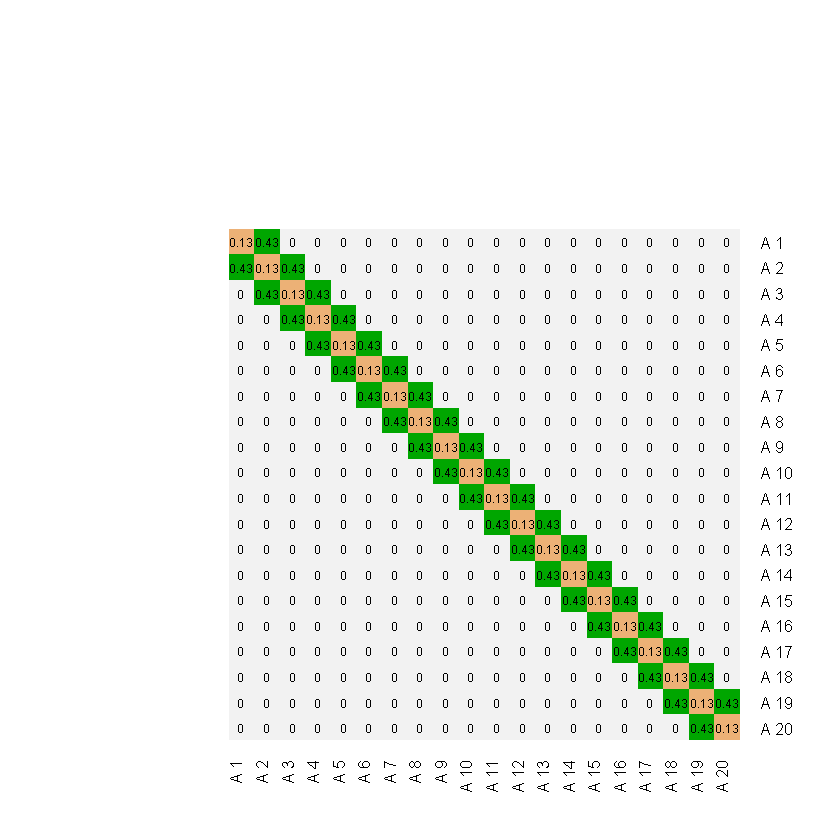

In [76]:
library(gplots)
A <- as.matrix(A)
heatmap.2(A, Rowv=FALSE, symm=TRUE, col=rev(terrain.colors(16)),
            distfun=function(c) as.dist(1 - c), trace="none", key  = FALSE,
            cellnote=round(A,2), notecex=0.7,
            notecol="black")

In [58]:
A

,A 1,A 2,A 3,A 4,A 5,A 6,A 7,A 8,A 9,A 10,A 11,A 12,A 13,A 14,A 15,A 16,A 17,A 18,A 19,A 20
A 1,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A 2,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A 3,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A 4,0.0000,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A 5,0.0000,0.0000,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A 6,0.0000,0.0000,0.0000,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A 7,0.0000,0.0000,0.0000,0.0000,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A 8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A 9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A 10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4332,0.1336,0.4332,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


## Wave Equation